# 퍼셉트론

## 객체 지향 퍼셉트론 API

- 객체 지향 방식을 사용하여 퍼셉트론 인터페이스를 가진 python class를 정의
- `Perceptron` 객체를 초기화한 후 `fit` method로 데이터에서 학습하고, `predict` method로 예측을 생성
- 객체의 초기화 과정에서 생성하지 않고 다른 method를 호출하여 만든 속성은 `_`를 추가 (예, `self.w_`)

In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    """
    Perceptron classifier
    
    __________
    eta : float
        학습률 (0.0 ~ 1.0 사이의 값)
    n_iter : int
        훈련 dataset 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 seed
    
    __________
    w_ : 1d-array
        학습된 가중치
    errors_ : list
        epcoh마다 누적된 분류 오류
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Training
        
        __________
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 sample과 n_features개의 특징으로 이루어진 train data
        y : array-like, shape = [n_samples]
            target 값
        
        __________
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #mean이 0, deviation이 0.01
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update #xo : 1 (bias)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """단위 계단 함수를 이용하여 class label 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## 붓꽃 데이터

- UCI machine learning 저장소에서 붓꽃 dataset을 DataFrame 객체로 load
- `tail` method로 마지막 다섯 줄 출력
- `iris.data`은 setosa, versicolor, virginica가 순서대로 50개씩 들어 있는 `.csv`
- setosa, versicolor의 다섯 번째 feature(TARGET)인 label을 추출하여 y에 저장
- setosa, versicolor의 첫 번째 feature인 꽃받침 길이와 세 번째 feature인 꽃잎 길이를 추출하여 X에 저장
- 추출한 data를 2차원 scatter plot으로 시각화

In [3]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


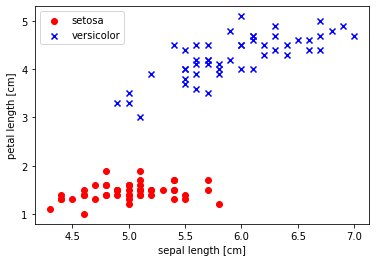

In [4]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

*Q.데이터가 어떻게 분포되어 있어야 perceptron이 잘 구별할 수 있을까?*

## 붓꽃 데이터로 학습하기

- 구현한 `Perceptorn`을 바탕으로 perceptron 학습
- 2차원 dataset의 결정 경계 표현

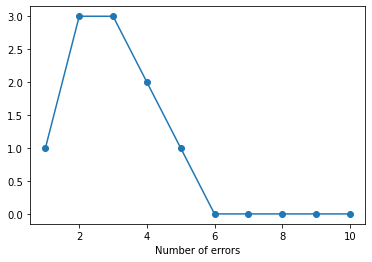

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.xlabel('Number of errors')
plt.show()

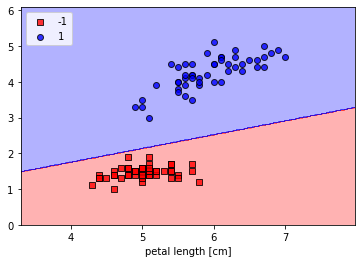

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s','o','x','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()